In [1]:
%matplotlib inline
import os
import time
import torch
import torchvision

import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [2]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic, compute_confusion_matrix
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples, plot_confusion_matrix
from helper_dataset import get_dataloaders_cifar10, UnNormalize

# Import Data

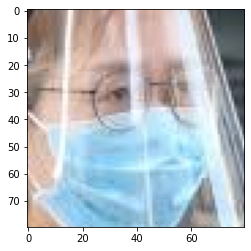

In [3]:
im = Image.open('./Face Mask Dataset/Test/WithMask/742.png')
plt.imshow(im, cmap='binary')

In [4]:
#Load train and test set
train_dir = './Face Mask Dataset/Train'
test_dir = './Face Mask Dataset/Test'
val_dir = './Face Mask Dataset/Validation'

In [6]:
val_list = []
test_list = []
train_list = []

for dirname, _, filenames in os.walk(train_dir):
    for filename in filenames:
        if "WithMask" in dirname:
            train_list.append([1, dirname, filename])
        elif "WithoutMask" in dirname:
            train_list.append([0, dirname, filename])
        
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        if "WithMask" in dirname:
            test_list.append([1, dirname, filename])
        elif "WithoutMask" in dirname:
            test_list.append([0, dirname, filename])

for dirname, _, filenames in os.walk(val_dir):
    for filename in filenames:
        if "WithMask" in dirname:
            val_list.append([1, dirname, filename])
        elif "WithoutMask" in dirname:
            val_list.append([0, dirname, filename])

In [7]:
df_val = pd.DataFrame(val_list, columns=["Class Label", "File Directory", "File Name"])
df_test = pd.DataFrame(test_list, columns=["Class Label", "File Directory", "File Name"])
df_train = pd.DataFrame(train_list, columns=["Class Label", "File Directory", "File Name"])

df_val.to_csv (r'df_val.csv', index = False, header=True)
df_test.to_csv (r'df_test.csv', index = False, header=True)
df_train.to_csv (r'df_train.csv', index = False, header=True)

df_train.head() 

,Class Label,File Directory,File Name
0,1,./Face Mask Dataset/Train\WithMask,10.png
1,1,./Face Mask Dataset/Train\WithMask,100.png
2,1,./Face Mask Dataset/Train\WithMask,1004.png
3,1,./Face Mask Dataset/Train\WithMask,1005.png
4,1,./Face Mask Dataset/Train\WithMask,1006.png


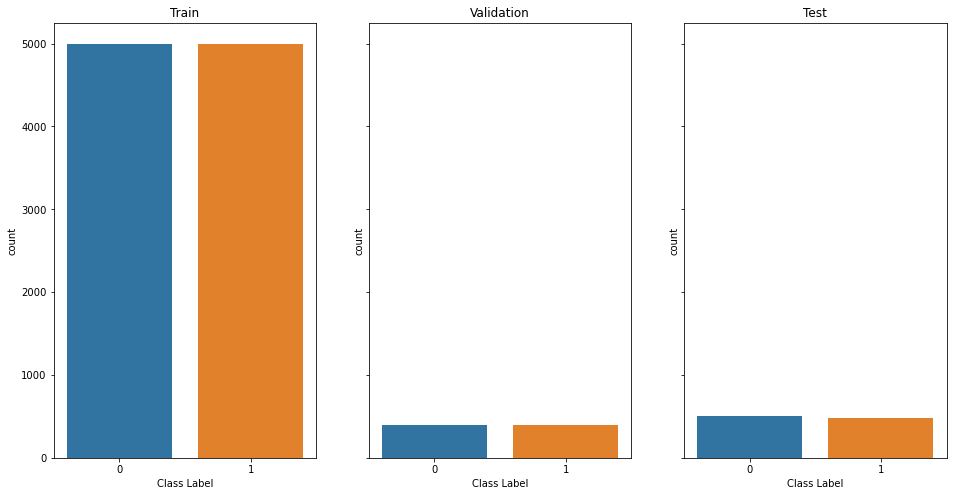

In [8]:
import seaborn as sns
fig, axs = plt.subplots(1,3,figsize = (16,8),sharey = True)
sns.countplot(x="Class Label", data=df_train,ax = axs[0]).set_title('Train')
sns.countplot(x="Class Label", data=df_val,ax = axs[1]).set_title('Validation')
sns.countplot(x="Class Label", data=df_test,ax = axs[2]).set_title('Test')


plt.show()

In [10]:
df_train['Class Label'].value_counts()

1    5000
0    5000
Name: Class Label, dtype: int64

In [11]:
df_val['Class Label'].value_counts()

1    400
0    400
Name: Class Label, dtype: int64

In [9]:
df_test['Class Label'].value_counts()

0    509
1    483
Name: Class Label, dtype: int64